# Основы машинного обучения, ПАДиИИ

## НИУ ВШЭ, 2024-25 учебный год

# Домашнее задание 2: Линейные модели. Работа с признаками

Задание выполнил(а):

Демьянов Степан

## Общая информация

__Внимание!__  


* Домашнее задание выполняется самостоятельно
* Не допускается помощь в решении домашнего задания от однокурсников или третьих лиц. «Похожие» решения считаются плагиатом, и все задействованные студенты — в том числе и те, у кого списали, — не могут получить за него больше 0 баллов
* Использование в решении домашнего задания генеративных моделей (ChatGPT и так далее) за рамками справочной и образовательной информации для генерации кода задания — считается плагиатом, и такое домашнее задание оценивается в 0 баллов
* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе

Каждое задание весит 1 или 2 балла (указано рядом с номером задания). Всего в сумме можно получить, если правильно решить все задания, 12 баллов.

## Импорт библиотек и загрузка данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

В этом задании мы рассмотрим различные аспекты построения линейной модели. Будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [2]:
DIAMONDS = 'https://raw.githubusercontent.com/evgpat/datasets/main/diamonds.csv'

In [3]:
data = pd.read_csv(DIAMONDS)
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Посмотрим на типы столбцов

In [4]:
data.dtypes

,0
Unnamed: 0,int64
carat,float64
cut,object
color,object
clarity,object
depth,float64
table,float64
price,int64
x,float64
y,float64


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

## Построение модели

### Задание 1 (1 балл)

Есть ли в наборе данных пропущенные значения? Если да, удалите строки с ними.

Также выведите на экран число пропусков в каждом столбце.

In [5]:
print(data.isnull().sum())
print(data.isna().sum())

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64
Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64


### Задача 2 (1 балл)

Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)?  
Если да, то удалите их. Поясните свой выбор (напишите текстом обоснование)

Столбец Unnamed: 0 является техническим и не несет информации о характеристиках бриллианта.

In [6]:
data = data.drop(columns=['Unnamed: 0'])

### Задание 3 (1 балл)

Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются корреляции между признаками.  
Выведите матрицу корреляций между всеми вещественными признаками и целевой переменной.

Какой вещественный признак коррелирует с целевой переменной больше всего?

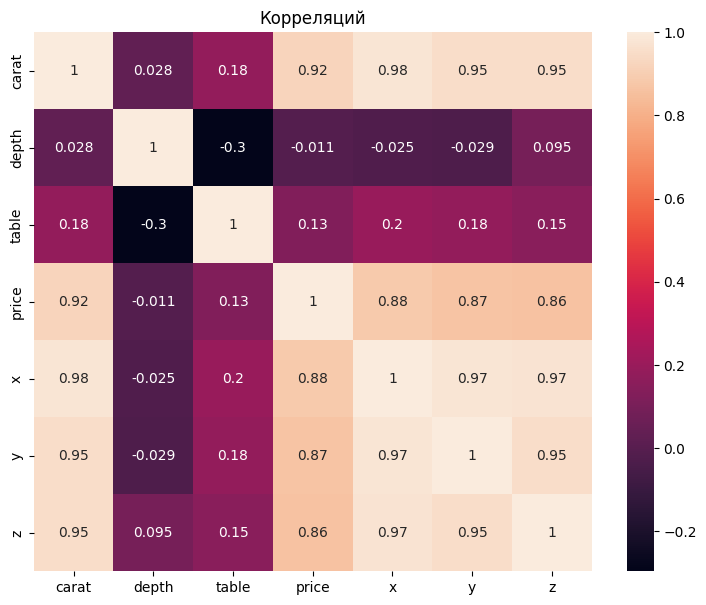

In [7]:
import seaborn as sns
plt.figure(figsize=(9, 7))
num = data.select_dtypes(include='number')
sns.heatmap(num.corr(), annot=True)
plt.title("Корреляций")
plt.show()

### Задание 4 (1 балл)  

Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования ([`pd.get_dummies`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) или `sklearn.OneHotEncoder`). Не забудьте поставить значение параметра `drop_first` равным `True`.

Сколько получилось столбцов в таблице `data`?

In [8]:
data = pd.get_dummies(data, columns=['cut', 'color', 'clarity'], drop_first=True)
data.shape[1]

24

### Задание 5 (1 балл)

Создайте матрицу `X`, содержащую все признаки, и не содержащую целевую переменную `price`.  
Также создайте вектор `y`, содержащий целевую переменную `price`.

In [9]:
x = data.drop(columns=['price'])
y = data['price']

Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной `0.3`

При разбиении укажите `random_state = 42`

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=42)

### Задание 6 (1 балл)

Зачастую при использовании линейных моделей вещественные признаки масштабируются.  В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`

*  Обучите (`fit`) scaler на тренировочных данных
*  Преобразуйте (`transform`) и трейн, и тест

После применения масштабирования матрица перестает быть объектом `pandas.DataFrame` - решите эту проблему

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


X_train = pd.DataFrame(X_train_scaled, columns=x.columns)
X_test = pd.DataFrame(X_test_scaled, columns=x.columns)

### Задание 7 (1 балл)

Обучите линейную регрессию на тренировочной выборке. Выведите r2-score на тренировочной и тестовой выборках

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


print(f"R² на тренировочной выборке: {r2_score(y_train, y_train_pred):.3f}")
print(f"R² на тестовой выборке: {r2_score(y_test, y_test_pred):.3f}")

R² на тренировочной выборке: 0.920
R² на тестовой выборке: 0.920


### Задание 8 (1 балл)

Выведите на экран веса, которые линейная регрессия присвоила признакам. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных

In [13]:
coefficients = pd.Series(model.coef_, index=x.columns)
print(coefficients.abs().sort_values(ascending=False))

carat            5338.615671
clarity_VS2      1817.664208
clarity_VS1      1670.318496
clarity_SI1      1611.571681
clarity_VVS2     1461.034194
clarity_VVS1     1284.809475
x                1100.418850
clarity_SI2      1042.921215
clarity_IF        975.933641
color_J           529.449216
color_I           442.783567
cut_Ideal         414.369515
color_H           362.002300
cut_Premium       339.239204
cut_Very Good     310.654256
color_G           202.863564
cut_Good          170.602933
color_F           104.560993
depth              90.173817
color_E            83.640021
table              60.332280
z                  34.258945
y                   6.458917
dtype: float64


Больше всего влияют carat, clarity, так как у них наибольшие коэффициенты

## Попытка улучшить качество модели

Эта часть является творческой, и задания в ней немного сложнее, чем предыдущие.  
Поэтому за каждое из них можно получить до двух баллов.

### Задание 9 (2 балла)

Как можно заметить из анализа корреляционной матрицы в задании 3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче, также свидетельствуют об этом. Для решения этой проблемы можно либо исключить некоторые признаки из модели (например, если признак линейно зависим с какими-то другими, его можно исключить из модели, т.е. удалить из матрицы объект-признак и заново обучить модель).

Удалите из матриц `Xtrain` и `Xtest` признак, который наиболее сильно коррелирует с остальными. Заново обучите модель и оцените её качество. Улучшилось ли качество модели?

Попробуйте удалить какой-то другой признак (можете попробовать несколько вариантов). Помогло ли это улучшить качество модели?

In [14]:
X_train_reduced = X_train.drop(columns=['x'])
X_test_reduced = X_test.drop(columns=['x'])

model_reduced = LinearRegression()
model_reduced.fit(X_train_reduced, y_train)

y_test_pred_reduced = model_reduced.predict(X_test_reduced)
print(f"Новый R² на тесте: {r2_score(y_test, y_test_pred_reduced):.3f}")

Новый R² на тесте: 0.919


### Задание 10 (2 балла)

Иногда генерация новых признаков помогает модели лучше находить взаимосвязи между целевой переменной и признаками. Попробуйте придумать новые признаки и добавить их в модель.  

Помогло ли это улучшить качество модели?

In [15]:
# ваш код здесь
...

## Выводы

Сделайте выводы, исходя из проделанной работы.

Какого наилучшего качества удалось добиться? Хорошее ли это качество на ваш взгляд? Что для этого вам пришлось сделать?

In [16]:
# ваш код здесь
...